# Генерация датасетов

In [16]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
import matplotlib.pyplot as pltv
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
import warnings
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, DBSCAN, KMeans

import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings('ignore')

from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import precision_score

In [2]:
data, data_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=333)

In [3]:
data2, data_y2 = make_blobs(n_samples=300, n_features=2, random_state=4444)

In [4]:
data3, data_y3 = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=3333)

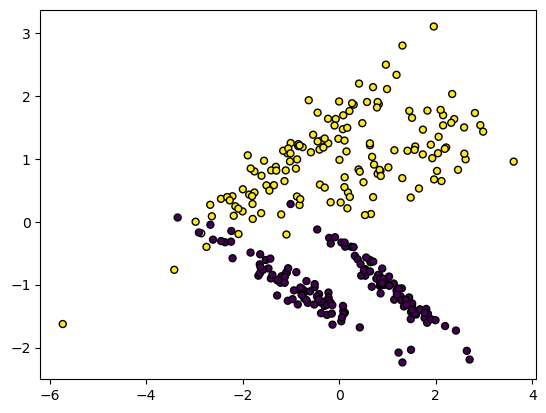

In [5]:
# как видит классификатор
plt.scatter(data[:, 0], data[:, 1], marker="o", c=data_y, s=25, edgecolor="k")
plt.show()

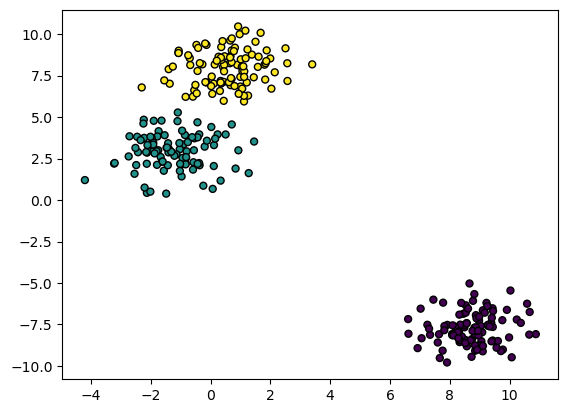

In [6]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data_y2, s=25, edgecolor="k")
plt.show()

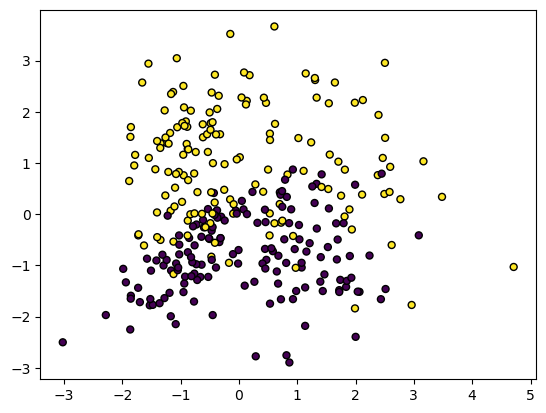

In [7]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data_y3, s=25, edgecolor="k")
plt.show()

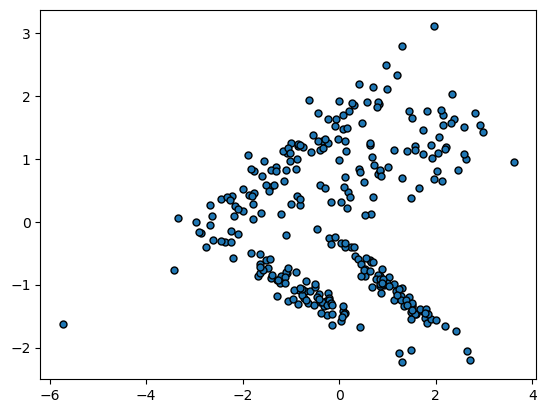

In [8]:
# как видит кластеризатор
plt.scatter(data[:, 0], data[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

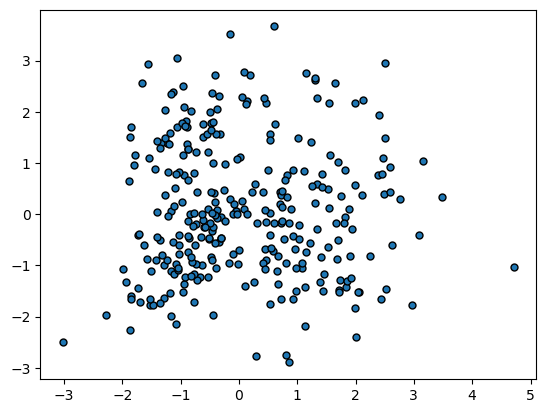

In [9]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

# Алгоритмы кластеризации

## K-means

Шаги алгоритма:
```
1. Выбрать случайно координаты центроидов для каждого кластера.
2. Посчитать расстояния от каждого объекта до центроидов.
3. Посчитать центр масс (центроид) каждого кластера.
4. Проверить условие остановки, вернуться к шагу 2.
```

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, n_init='auto').fit(data)
kmeans2 = KMeans(2, n_init='auto').fit(data2)
kmeans3 = KMeans(2, n_init='auto').fit(data3)

In [15]:
def draw(data, kmeans):
  plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [19]:
def best_method(methods, metrics):
    return max([(value[metrics], k) for k, value in methods.items()])

methods = [{}, {}, {}]

In [32]:
datas = [data, data2, data3]
datas_y = [data_y, data_y2, data_y3]
kmeanses = [kmeans, kmeans2, kmeans3]

def metrics(n, labels, data, data_y):
  print(f"Датасет {n}:")
  print(f"Rand_score: {rand_score(labels, data_y)}")
  print(f"Silhouette_score: {silhouette_score(data, labels)}")
  print(f"Homogeneity_score: {homogeneity_score(data_y, labels)}")   #однородность : каждый кластер содержит только членов одного класса.
  print(f"Completeness_score: {completeness_score(data_y, labels)} \n")   #полнота : все члены данного класса относятся к одному кластеру.

metrics(1, kmeans.labels_, data, data_y)
metrics(2, kmeans2.labels_, data2, data_y2)
metrics(3, kmeans3.labels_, data3, data_y3)

Датасет 1:
Rand_score: 0.5003790412486064
Silhouette_score: -0.03584277736308423
Homogeneity_score: 0.005320433000984079
Completeness_score: 0.0027370831165082934 

Датасет 2:
Rand_score: 0.7770345596432553
Silhouette_score: 0.8123397661883708
Homogeneity_score: 0.5793801642856958
Completeness_score: 1.0000000000000009 

Датасет 3:
Rand_score: 0.6911705685618729
Silhouette_score: 0.3438722139256222
Homogeneity_score: 0.31985083903153794
Completeness_score: 0.33009456717877034 



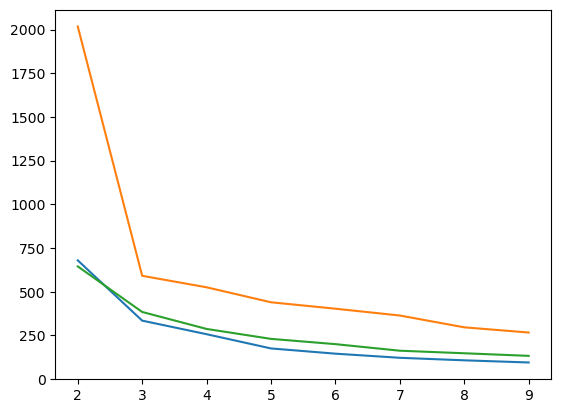

In [31]:
def elbow_method(data):
  inertias = []

  for i in range(2, 10):
    m = KMeans(i, n_init='auto').fit(data)
    inertias.append(m.inertia_)   #компактность

  plt.plot(range(2,10), inertias)


for i in range(3):
  elbow_method(datas[i])

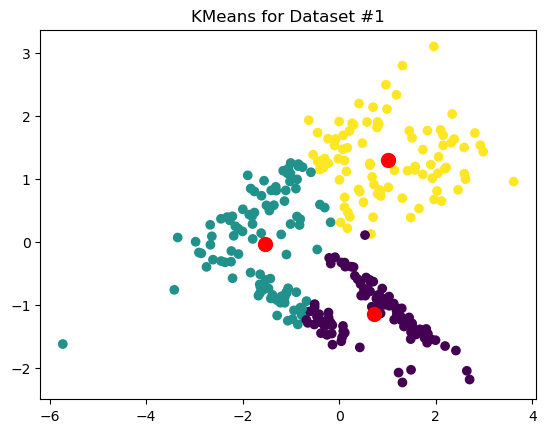

Датасет 1:
Rand_score: 0.7140468227424749
Silhouette_score: 0.45673432380721657
Homogeneity_score: 0.634679924904315
Completeness_score: 0.40141473563615426 



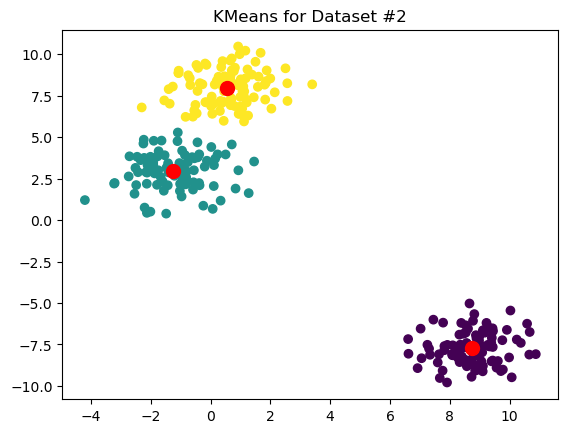

Датасет 2:
Rand_score: 1.0
Silhouette_score: 0.7332059195380315
Homogeneity_score: 1.0
Completeness_score: 1.0 



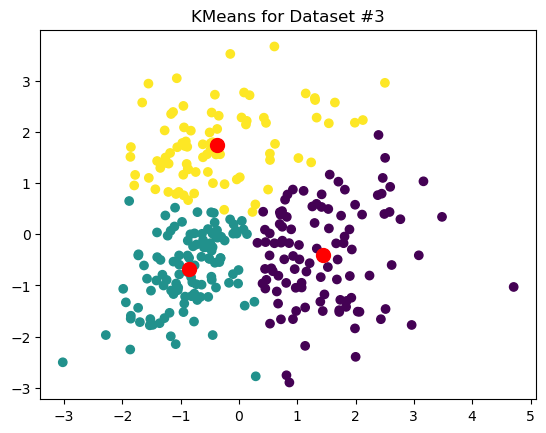

Датасет 3:
Rand_score: 0.6089855072463768
Silhouette_score: 0.4166274982716736
Homogeneity_score: 0.3263246159262789
Completeness_score: 0.20741350104673711 



In [33]:
n = (3, 3, 3)
for i in range(3):
    kmeans = KMeans(n[i], n_init='auto').fit(datas[i])

    plt.title(f'KMeans for Dataset #{i+1}')
    plt.scatter(datas[i][:,0], datas[i][:,1], c=kmeans.labels_)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')
    plt.show()

    methods[i]['KMeans'] = metrics(i+1, kmeans.labels_, datas[i], datas_y[i])

### Оценка качества кластеризации


Меры оценки кластеризации бывают двух видов:
- Внутренние -- меры отображают качество кластеризации только по информации в данных
- Внешние -- меры основаны на сравнении результата кластеризации с априори известным разделением на классыссы

Самые частые:
- Внутренние: силуэт
- Внешние: rand score

In [34]:
for i in range(3):
    methods[i]['KMeans'] = metrics(i+1, kmeans.labels_, datas[i], datas_y[i])

Датасет 1:
Rand_score: 0.5003567447045708
Silhouette_score: -0.024515736803626707
Homogeneity_score: 0.004069958251923186
Completeness_score: 0.002586885110549411 

Датасет 2:
Rand_score: 0.5530211817168339
Silhouette_score: -0.029167506303890214
Homogeneity_score: 0.0013763316968695082
Completeness_score: 0.0013865300615649313 

Датасет 3:
Rand_score: 0.6089855072463768
Silhouette_score: 0.4166274982716736
Homogeneity_score: 0.3263246159262789
Completeness_score: 0.20741350104673711 



### Подбор оптимального количества кластеров

Количество кластеров - обычный гиперпараметр.

Т.е. для подбора оптимального гиперпараметра нужно определиться с оценкой качества алгоритма и списком значений для гиперпараметра.

### Метод силуэта

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
def silhouette_method(data):
  ss = []
  for i in range(2, 10):
    ss.append(silhouette_score(data, KMeans(i, n_init='auto').fit(data).labels_))

  plt.plot(range(2,10), ss)

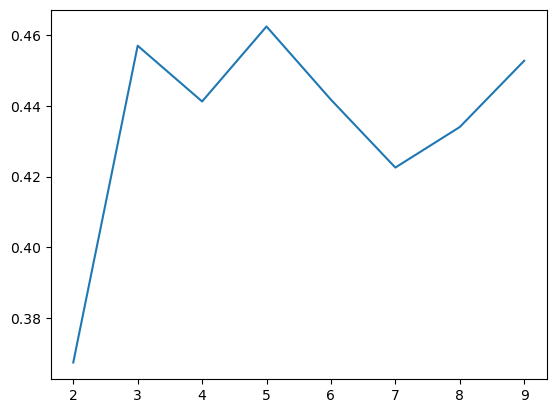

In [49]:
silhouette_method(data)

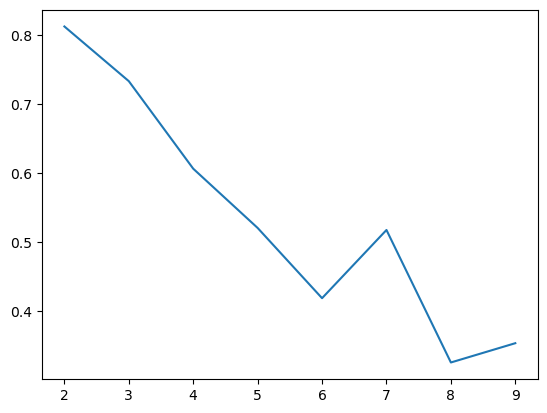

In [48]:
silhouette_method(data2)

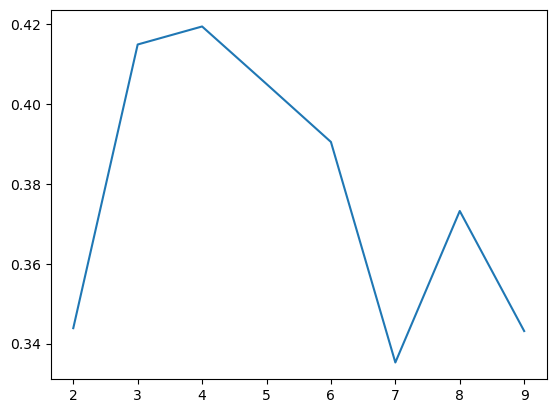

In [51]:
silhouette_method(data3)

In [52]:
kmeans = KMeans(3, n_init='auto').fit(data)
kmeans2 = KMeans(6, n_init='auto').fit(data2)
kmeans3 = KMeans(4, n_init='auto').fit(data3)

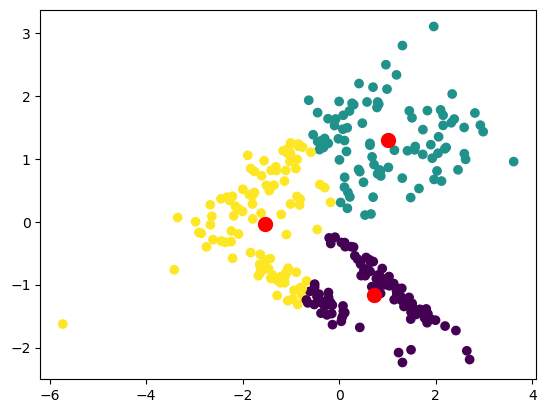

In [56]:
draw(data, kmeans)

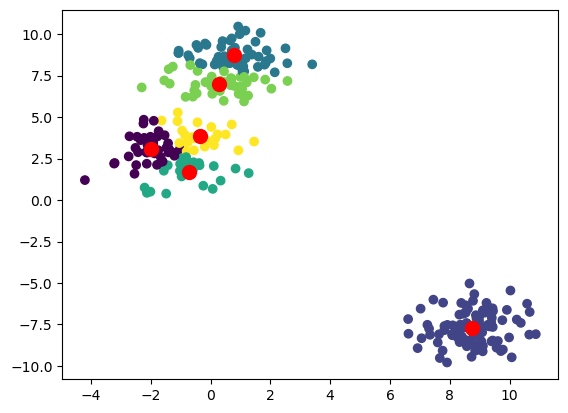

In [57]:
draw(data2, kmeans2)

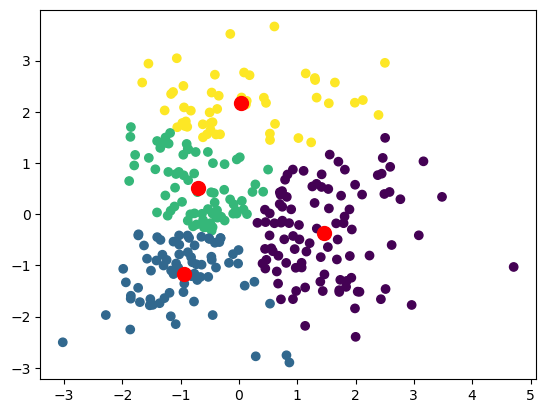

In [58]:
draw(data3, kmeans3)

In [59]:
metrics(1, kmeans.labels_, data, data_y)

Датасет 1:
Rand_score: 0.7184169453734671
Silhouette_score: 0.4566297204005528
Homogeneity_score: 0.6619379227750603
Completeness_score: 0.41844735240591613 



In [60]:
metrics(2, kmeans2.labels_, data2, data_y2)

Датасет 2:
Rand_score: 0.8743366778149387
Silhouette_score: 0.5360266592289645
Homogeneity_score: 1.0
Completeness_score: 0.654643762902965 



In [61]:
metrics(3, kmeans3.labels_, data3, data_y3)

Датасет 3:
Rand_score: 0.5844370122630992
Silhouette_score: 0.3439626547133926
Homogeneity_score: 0.337443342669457
Completeness_score: 0.17195359482051584 



## Affinity propagation

Affinity Propagation (AP) - это алгоритм кластеризации, основанный на передаче сообщений между точками данных. В отличие от других алгоритмов кластеризации, таких как K-means, AP не требует заранее определенного числа кластеров. Для этой цели двумя важными параметрами являются "preference", которые контролируют количество экземпляров и "damping factor", который снижает ответственность и доступность сообщений, чтобы избежать числовых колебаний при обновлении этих сообщений. Подбираются через поиск по сетке.

In [64]:
datas = [data, data2, data3]

for i in range(3):
    ss = []
    for dp in np.arange(0.5, 0.9, 0.1):
        ss.append((silhouette_score(datas[i], AffinityPropagation(damping=dp).fit(datas[i]).labels_), dp))
    
    print(max(ss))

(0.4579219426522968, 0.7999999999999999)
(0.35131702739157944, 0.7999999999999999)
(0.3586113524995503, 0.6)


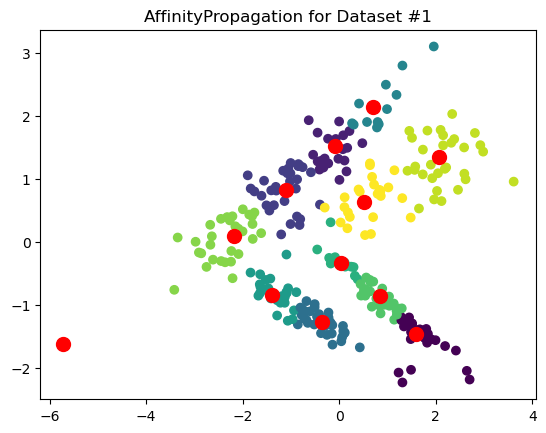

Датасет 1:
Rand_score: 0.5840133779264214
Silhouette_score: 0.4579219426522968
Homogeneity_score: 0.8378012301482999
Completeness_score: 0.24581099711434629 



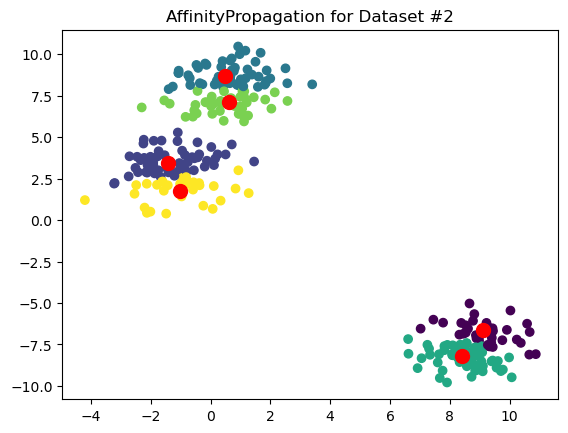

Датасет 2:
Rand_score: 0.8430546265328874
Silhouette_score: 0.35131702739157944
Homogeneity_score: 1.0000000000000002
Completeness_score: 0.6240037834593589 



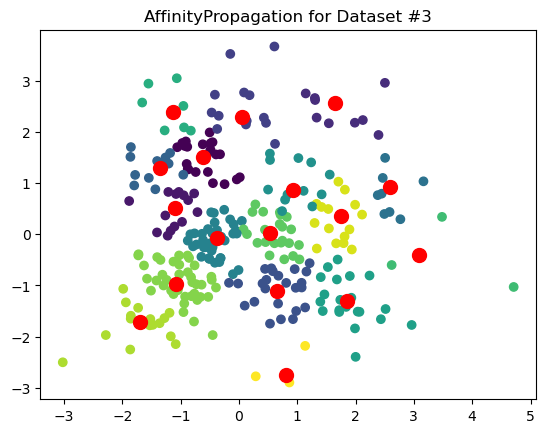

Датасет 3:
Rand_score: 0.5321739130434783
Silhouette_score: 0.3586113524995503
Homogeneity_score: 0.4867058185925709
Completeness_score: 0.12644510924839822 



In [68]:
damping = (0.8, 0.8, 0.6)
for i in range(3):
    AP = AffinityPropagation(damping=damping[i]).fit(datas[i])

    plt.title(f'AffinityPropagation for Dataset #{i+1}')
    plt.scatter(datas[i][:,0], datas[i][:,1], c=AP.labels_)
    plt.scatter(AP.cluster_centers_[:,0], AP.cluster_centers_[:,1], s=100, c='red')
    plt.show()

    methods[i]['AffinityPropagation'] = metrics(i+1, AP.labels_, datas[i], datas_y[i])

### DBS-SCAN

In [66]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def dbs(data):
    nbrs = NearestNeighbors(n_neighbors=4).fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(np.mean(distances, axis=1))
    plt.plot(distances)
    plt.show()

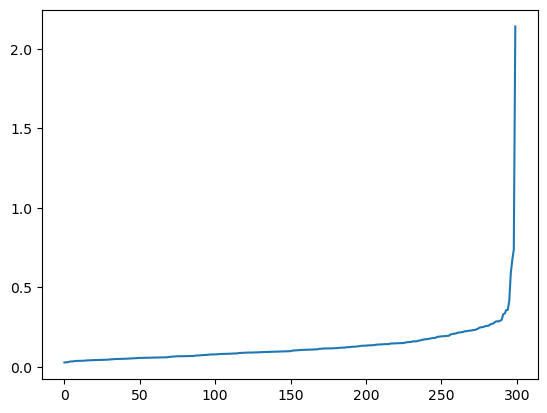

In [67]:
dbs(data)

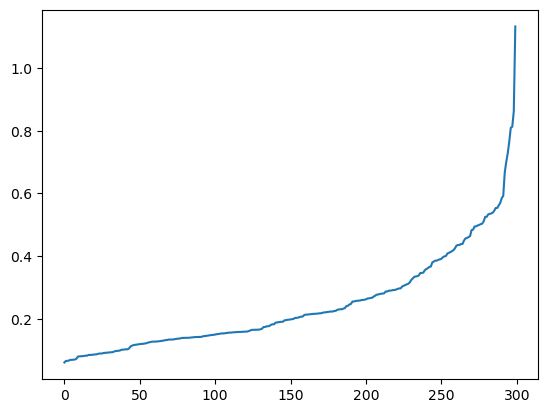

In [69]:
dbs(data2)

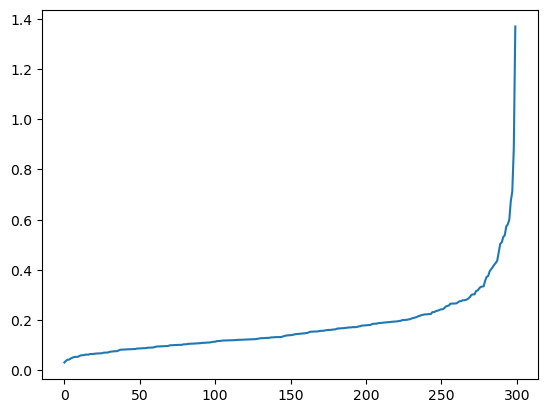

In [70]:
dbs(data3)

In [71]:
from sklearn.cluster import DBSCAN
datas = [data, data2, data3]

eps = (0.25, 0.5, 0.3)
for i in range(3):
    ss = []
    for min_s in range(2, 16):
        ss.append((silhouette_score(datas[i], DBSCAN(eps=eps[i], min_samples=min_s).fit(datas[i]).labels_), min_s))
        
    print(max(ss))

(0.22101770446815114, 4)
(0.35673156659726163, 7)
(-0.034222863455996885, 4)


[-1  0  1  2  3  4  5  6  7  8]


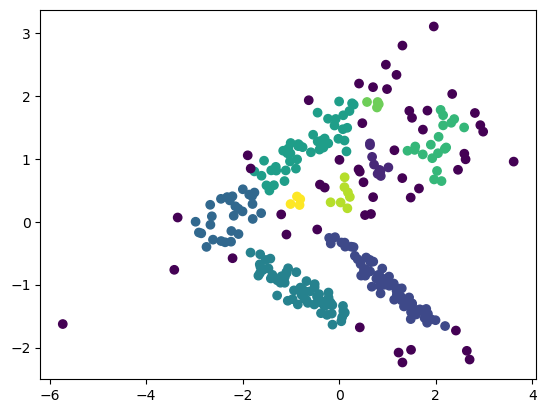

Датасет 1:
Rand_score: 0.6359420289855072
Silhouette_score: 0.22101770446815114
Homogeneity_score: 0.7684474377881036
Completeness_score: 0.27209605114080704 

[-1  0  1  2]


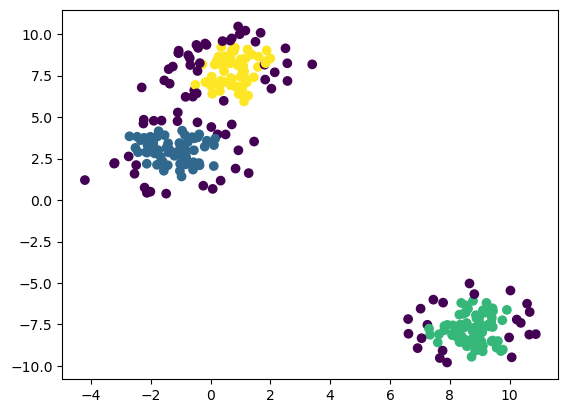

Датасет 2:
Rand_score: 0.8081605351170569
Silhouette_score: 0.35673156659726163
Homogeneity_score: 0.7133574591626445
Completeness_score: 0.5685827782840636 

[-1  0  1  2  3  4  5  6]


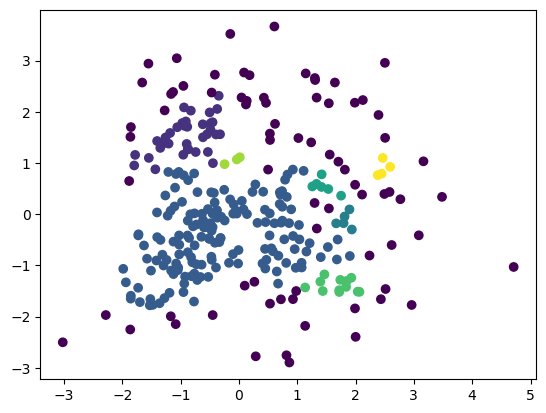

Датасет 3:
Rand_score: 0.5570345596432553
Silhouette_score: -0.034222863455996885
Homogeneity_score: 0.2436034748885949
Completeness_score: 0.12803387040206246 



In [73]:
datas_y = [data_y, data_y2, data_y3]

min_samples = (4, 7, 4)
for i in range(3):
    dbscan = DBSCAN(eps=eps[i], min_samples=min_samples[i]).fit(datas[i])
    print(np.unique(dbscan.labels_))
    plt.scatter(datas[i][:,0], datas[i][:,1], c=dbscan.labels_)
    plt.show()

    methods[i]['DBSCAN'] = metrics(i+1, dbscan.labels_, datas[i], datas_y[i])

## Gaussian Mixtures

In [81]:
from sklearn.mixture import GaussianMixture

for i in range(3):
    ss = []
    for n_ in range(2, 10):
        ss.append((silhouette_score(datas[i], GaussianMixture(n_components=n_).fit_predict(datas[i])), n_))
    print(max(ss))

(0.3653081690616238, 2)
(0.8123397661883708, 2)
(0.4051300938803655, 4)


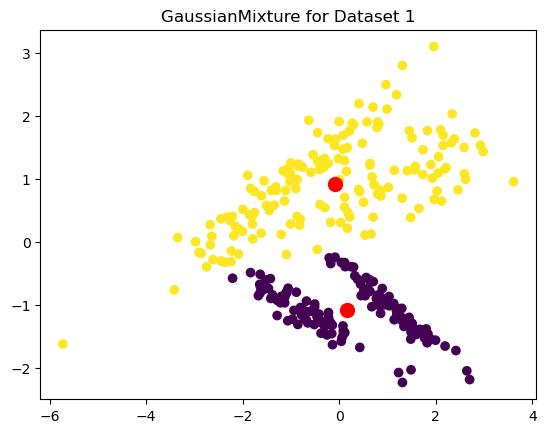

Датасет 1:
Rand_score: 0.9291192865105908
Silhouette_score: 0.3525383447994696
Homogeneity_score: 0.7918329409719617
Completeness_score: 0.7938958089178779 



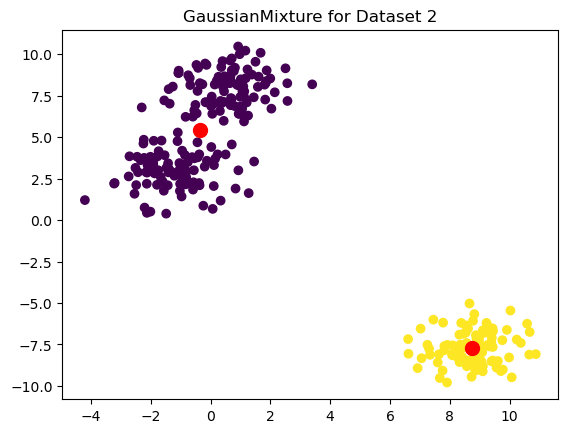

Датасет 2:
Rand_score: 0.7770345596432553
Silhouette_score: 0.8123397661883708
Homogeneity_score: 0.5793801642856958
Completeness_score: 1.0000000000000009 



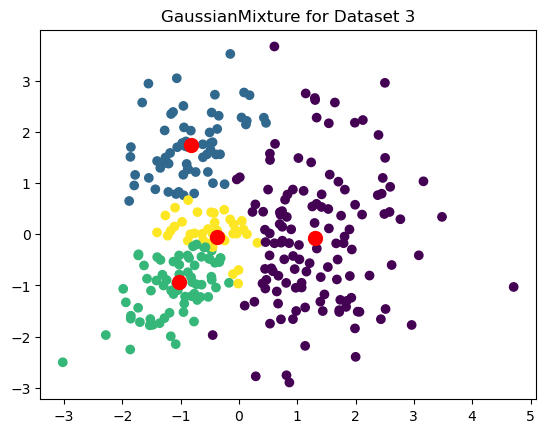

Датасет 3:
Rand_score: 0.5688963210702341
Silhouette_score: 0.24230436594564797
Homogeneity_score: 0.29316428470338696
Completeness_score: 0.1561563379839321 



In [83]:
n_components = (2, 2, 4)

for i in range(3):
    GM = GaussianMixture(n_components=n_components[i]).fit(datas[i])

    plt.title(f'GaussianMixture for Dataset {i+1}')
    plt.scatter(datas[i][:,0], datas[i][:,1], c=GM.predict(datas[i]))
    plt.scatter(GM.means_[:,0], GM.means_[:,1], s=100, c='red')
    plt.show()

    methods[i]['GaussianMixture'] = metrics(i+1, GM.predict(datas[i]), datas[i], datas_y[i])

### SOM

In [124]:
%pip install sklearn_som

Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn_som.som import SOM

In [85]:
for i in range(3):
    ss = []
    for m in range(2,5):
        for n in range(2,5):
            _, dim = datas[i].shape
            ss.append((silhouette_score(datas[i], SOM(m=m, n=n, dim=dim).fit_predict(datas[i])), m, n))
    print(max(ss))  

(0.4166061754443393, 2, 2)
(0.42376860387875276, 3, 2)
(0.3838531942882208, 2, 2)


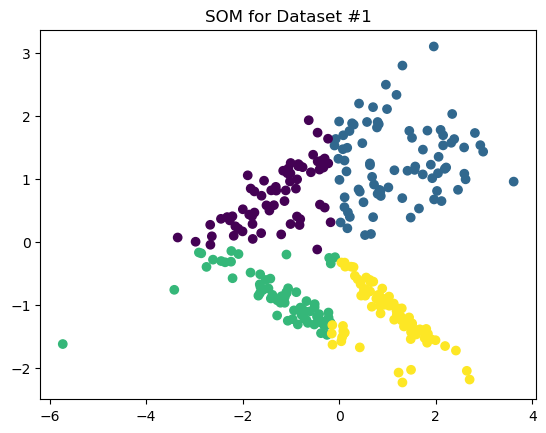

Датасет 1:
Rand_score: 0.669453734671126
Silhouette_score: 0.40399735534796755
Homogeneity_score: 0.6882027741077672
Completeness_score: 0.3500322892533445 



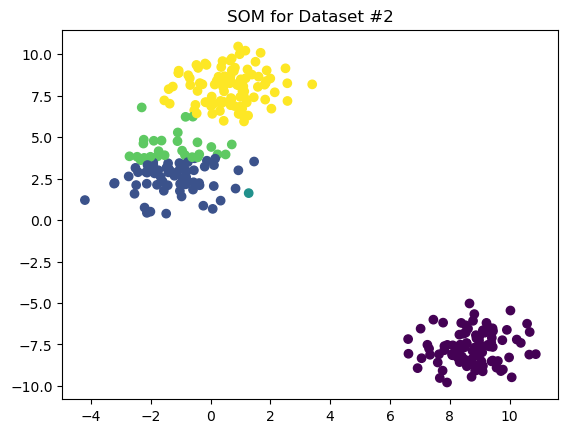

Датасет 2:
Rand_score: 0.9447491638795986
Silhouette_score: 0.4377338620011193
Homogeneity_score: 1.0
Completeness_score: 0.8014521636771734 



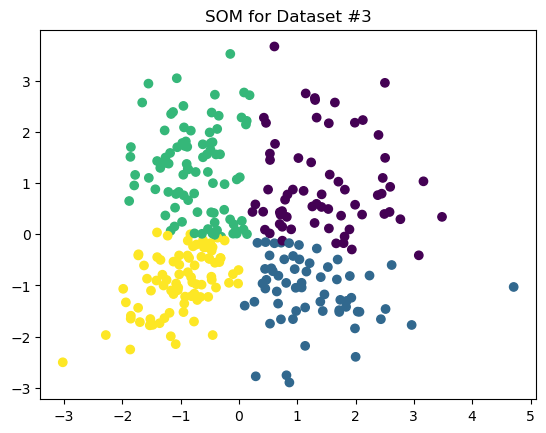

Датасет 3:
Rand_score: 0.5986622073578596
Silhouette_score: 0.3691994881286003
Homogeneity_score: 0.3025831914640883
Completeness_score: 0.15324188092873897 



In [87]:
m_n = ((2, 2), (3, 2), (2, 2))
for i in range(3):
    _, dim = datas[i].shape
    m, n = m_n[i]
    som = SOM(m=m, n=n, dim=dim)
    plt.title(f'SOM for Dataset #{i+1}')
    plt.scatter(datas[i][:,0], datas[i][:,1], c=som.fit_predict(datas[i]))
    plt.show()

    methods[i]['SOM'] = metrics(i+1, som.fit_predict(datas[i]), datas[i], datas_y[i])

## Иерархическая кластеризация

In [88]:
from scipy.cluster import hierarchy
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [89]:
clusters = hierarchy.linkage(data, method="ward")
clusters2 = hierarchy.linkage(data2, method="ward")
clusters3 = hierarchy.linkage(data3, method="ward")

In [90]:
def hierarchy_draw(clusters):
  plt.figure(figsize=(8, 6))
  dendrogram = hierarchy.dendrogram(clusters)
  # Plotting a horizontal line based on the first biggest distance between clusters
  plt.axhline(25, color='red', linestyle='--');
  # Plotting a horizontal line based on the second biggest distance between clusters
  plt.axhline(15, color='crimson');

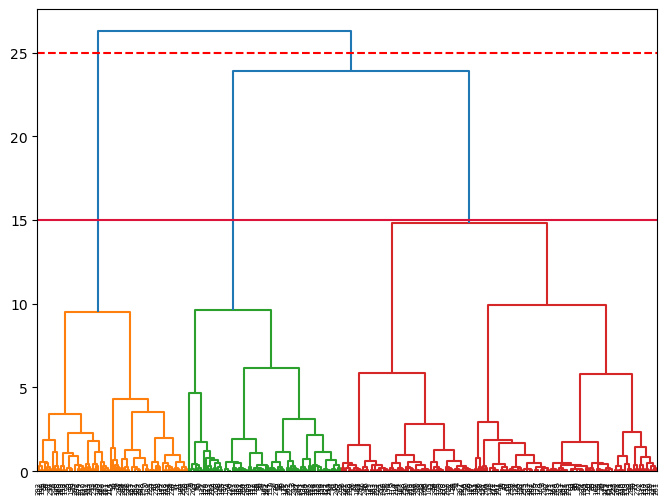

In [91]:
hierarchy_draw(clusters)

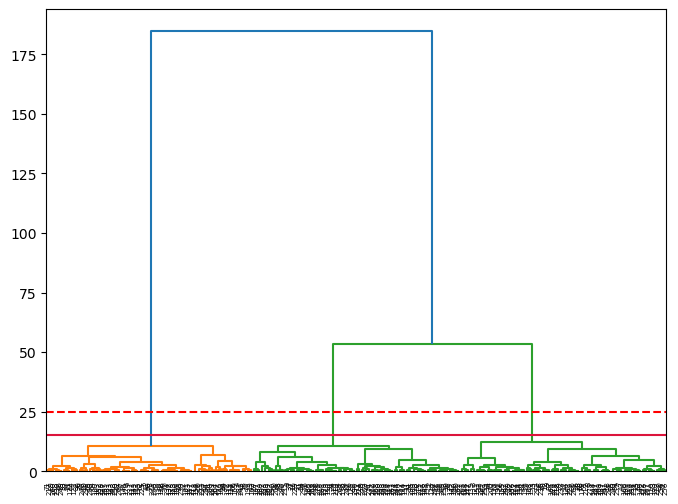

In [92]:
hierarchy_draw(clusters2)

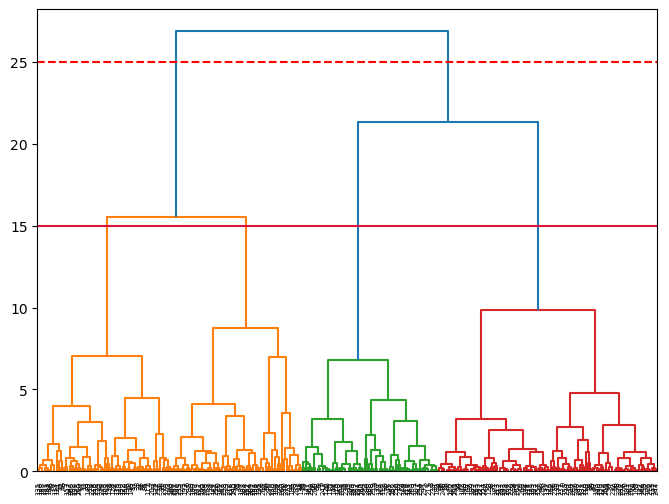

In [93]:
hierarchy_draw(clusters3)

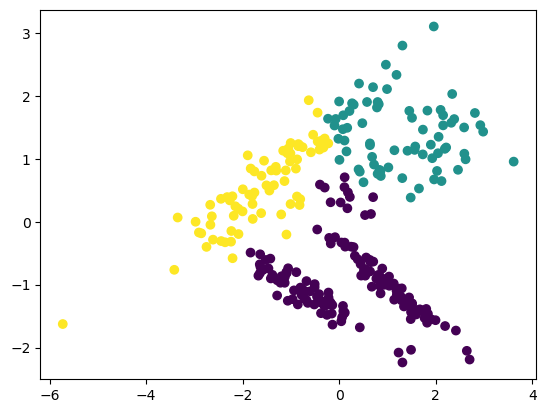

In [94]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data)
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

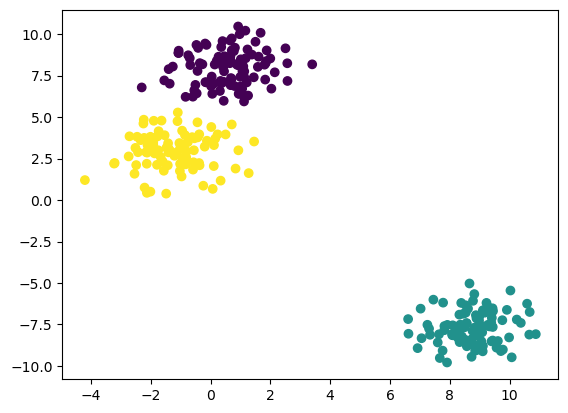

In [95]:
clustering2 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data2)
plt.scatter(data2[:,0], data2[:,1], c=clustering2.labels_)

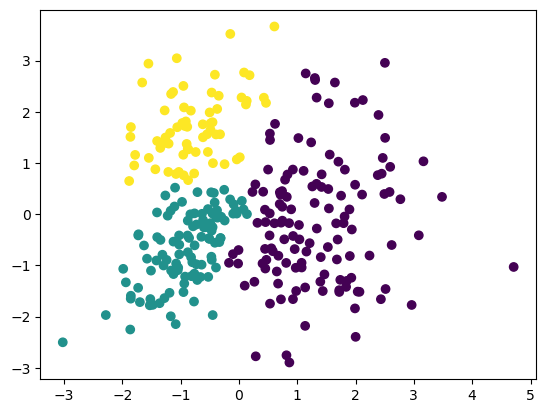

In [96]:
clustering3 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data3)
plt.scatter(data3[:,0], data3[:,1], c=clustering3.labels_)

In [102]:
for i in range(3):
    print(best_method(methods[i], 'Silhouette_score'))

TypeError: 'NoneType' object is not subscriptable

# 2 Задание

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [143]:
data = pd.read_csv('H:/Downloads/Nen/my_card_transdata.csv', sep=";")   #C:/Venv/notebooks/my_card_transdata.csv

In [144]:
data.head()

,Unnamed: 0,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0,57.877857,0.311140,1.945940,True,True,False,False,False
1,1,10.829943,0.175592,1.294219,True,False,False,False,False
2,2,5.091079,0.805153,0.427715,True,False,False,True,False
3,3,2.247564,5.600044,0.362663,True,True,False,True,False
4,4,44.190936,0.566486,2.222767,True,True,False,True,False


In [145]:
df= pd.get_dummies(data, drop_first=True)
df.head()

,Unnamed: 0,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0,57.877857,0.311140,1.945940,True,True,False,False,False
1,1,10.829943,0.175592,1.294219,True,False,False,False,False
2,2,5.091079,0.805153,0.427715,True,False,False,True,False
3,3,2.247564,5.600044,0.362663,True,True,False,True,False
4,4,44.190936,0.566486,2.222767,True,True,False,True,False


In [146]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [147]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,True,True,False,False,False
1,10.829943,0.175592,1.294219,True,False,False,False,False
2,5.091079,0.805153,0.427715,True,False,False,True,False
3,2.247564,5.600044,0.362663,True,True,False,True,False
4,44.190936,0.566486,2.222767,True,True,False,True,False


In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sc = StandardScaler()
df_sc = sc.fit_transform(df)

In [149]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans_fit = kmeans.fit(df_sc)

In [150]:
print(kmeans_fit.cluster_centers_)

[[-9.45644658e-02 -5.08397197e-02 -2.10116722e-01 -1.01402647e-02
   2.70880863e-02  4.80312237e-02  7.31657141e-01 -3.08716720e-01]
 [-2.59264260e-02 -1.73374160e-02 -6.13932929e-02  1.59150079e-02
   4.38217184e-03  3.47555709e-04 -1.36676039e+00 -3.08716720e-01]
 [ 7.01240066e-01  3.90054086e-01  1.57265606e+00  3.39456836e-03
  -1.89178337e-01 -3.06933968e-01  5.93985901e-01  3.14986664e+00]]


In [151]:
print(kmeans.labels_)

[1 1 0 ... 0 1 0]


In [152]:
kmeans_fit.predict(df_sc)

array([1, 1, 0, ..., 0, 1, 0])

In [153]:
kmeans_fit.inertia_ # это общая WCSS.

787205.087403056

In [154]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_score(df_sc, kmeans.labels_)

0.2972848921216437

In [156]:
WCSS=[] # for elbow method
silhouette_coefficients = [] # for Silhouette method
K= 15
for i in range(2,K+1):  # Notice you start at 2 clusters for silhouette coefficient
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df_sc)
    WCSS.append(kmeans.inertia_)
    scores = silhouette_score(df_sc, kmeans.labels_)
    silhouette_coefficients.append(scores)

In [157]:
optimal_k = pd.DataFrame({'K':range(2,K+1), 'WCSS':WCSS, 'silhouette_score':silhouette_coefficients})
optimal_k

,K,WCSS,silhouette_score
0,2,917431.631431,0.483043
1,3,781900.463871,0.411372
2,4,665605.158409,0.351817
3,5,566255.061418,0.409714
4,6,504069.470116,0.465305
5,7,435992.222713,0.472299
6,8,379523.258032,0.484121
7,9,343292.094574,0.552160
8,10,308297.051928,0.560306
9,11,282627.073240,0.565804


In [158]:
kmeans = KMeans(n_clusters=2, random_state=100)
kmeans_fit = kmeans.fit(df_sc)

In [159]:
kmeans_fit.cluster_centers_

array([[ 7.09474781e-01,  3.95190876e-01,  1.58906342e+00,
         5.49554669e-03, -1.87620121e-01, -3.04467094e-01,
         5.81964360e-01,  3.12746286e+00],
       [-7.00333584e-02, -3.90099057e-02, -1.56858920e-01,
        -5.42473957e-04,  1.85202738e-02,  3.00544201e-02,
        -5.74466066e-02, -3.08716720e-01]])

In [160]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [161]:
kmeans_fit.predict(df_sc)

array([1, 1, 1, ..., 1, 1, 1])

In [162]:
silhouette_score(df_sc, kmeans.labels_)

0.48287427221336565

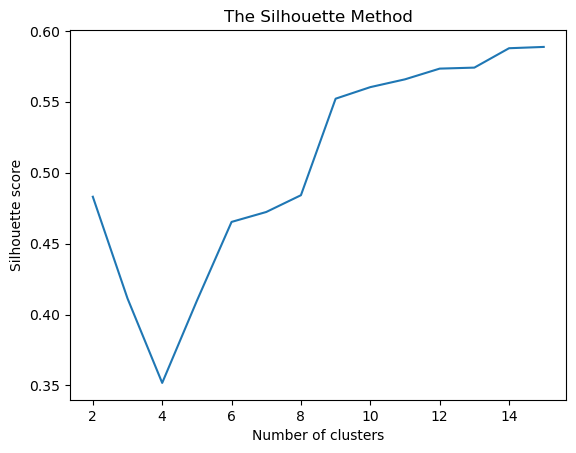

In [163]:
sns.lineplot(x='K', y='silhouette_score', data=  optimal_k)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

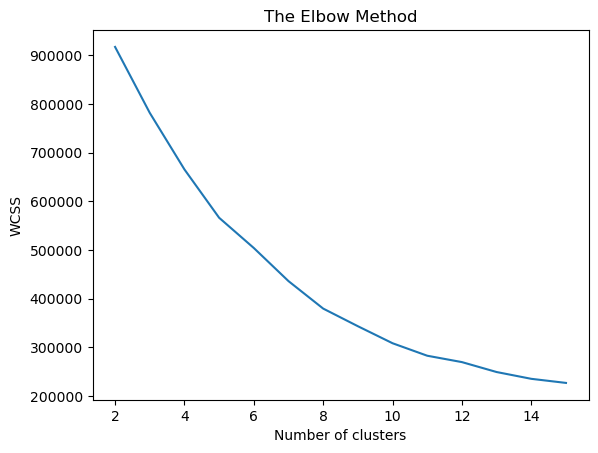

In [164]:
sns.lineplot(x='K', y='WCSS', data = optimal_k)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Dbscan

In [165]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,True,True,False,False,False
1,10.829943,0.175592,1.294219,True,False,False,False,False
2,5.091079,0.805153,0.427715,True,False,False,True,False
3,2.247564,5.600044,0.362663,True,True,False,True,False
4,44.190936,0.566486,2.222767,True,True,False,True,False
...,...,...,...,...,...,...,...,...
137457,2.278106,0.074751,0.109677,True,False,False,True,False
137458,3.925273,1.218568,3.370015,True,True,True,True,False
137459,48.610727,0.803050,0.808228,True,False,False,True,False
137460,15.374292,0.086613,0.494629,True,True,True,False,False


In [166]:
df_viz = df.drop(['distance_from_last_transaction', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud'], axis=1)

In [167]:
df_viz

,distance_from_home,ratio_to_median_purchase_price
0,57.877857,1.945940
1,10.829943,1.294219
2,5.091079,0.427715
3,2.247564,0.362663
4,44.190936,2.222767
...,...,...
137457,2.278106,0.109677
137458,3.925273,3.370015
137459,48.610727,0.808228
137460,15.374292,0.494629


In [168]:
nbrs = NearestNeighbors(n_neighbors=10).fit(df_viz)
distances, indices = nbrs.kneighbors(df_viz)
distances

array([[0.        , 0.13635637, 0.13896879, ..., 0.27997863, 0.31363908,
        0.33515472],
       [0.        , 0.01745841, 0.0188129 , ..., 0.03661221, 0.03919301,
        0.04296721],
       [0.        , 0.00678128, 0.00733703, ..., 0.02396016, 0.02478573,
        0.02646539],
       ...,
       [0.        , 0.01729126, 0.0409605 , ..., 0.08702769, 0.09383583,
        0.10240602],
       [0.        , 0.00997326, 0.01715401, ..., 0.03230029, 0.03374178,
        0.0418769 ],
       [0.        , 0.01096974, 0.01969205, ..., 0.03294031, 0.03665449,
        0.03711149]])

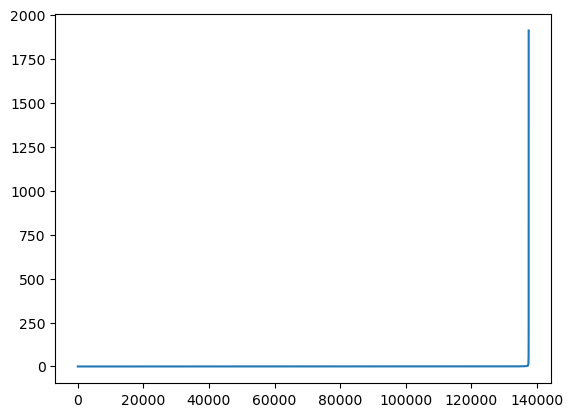

In [169]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29]


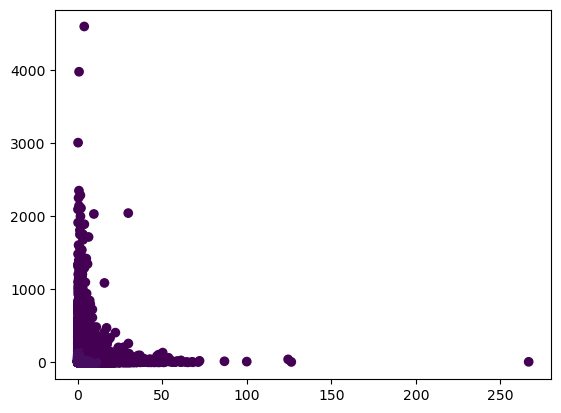

In [170]:
dbscan = DBSCAN(eps=0.5, min_samples=15).fit(df_viz)

print(np.unique(dbscan.labels_))
plt.scatter(df_viz['ratio_to_median_purchase_price'], df_viz['distance_from_home'], c=dbscan.labels_)

In [171]:
print("Оценка silhouette score: ", silhouette_score(df_viz, dbscan.labels_))

Оценка silhouette score:  -0.47050583799939955


## Cluster visualization

In [172]:
print(df_viz)

        distance_from_home  ratio_to_median_purchase_price
0                57.877857                        1.945940
1                10.829943                        1.294219
2                 5.091079                        0.427715
3                 2.247564                        0.362663
4                44.190936                        2.222767
...                    ...                             ...
137457            2.278106                        0.109677
137458            3.925273                        3.370015
137459           48.610727                        0.808228
137460           15.374292                        0.494629
137461            0.734225                        2.178027

[137462 rows x 2 columns]


In [173]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(df_viz)
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [174]:
print(kmeans.cluster_centers_)

[[ 20.6894341    1.82067769]
 [369.56322197   1.80181268]]


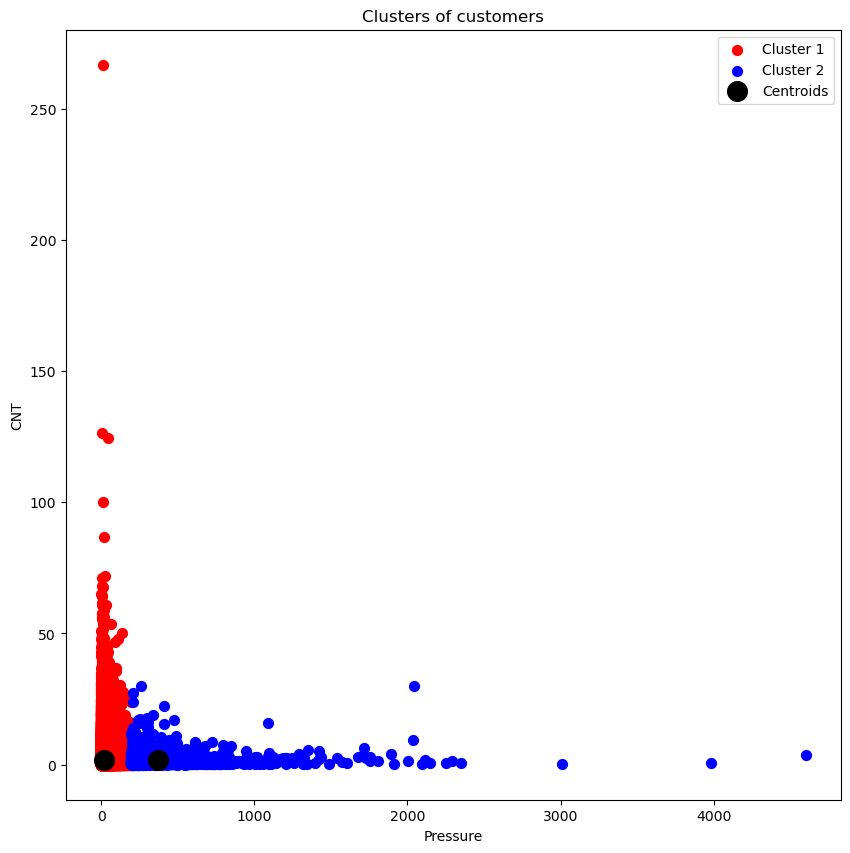

In [175]:
plt.figure(figsize=(10,10))
plt.scatter(df_viz[clusters == 0].iloc[:,0], df_viz[clusters == 0].iloc[:,1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df_viz[clusters == 1].iloc[:,0], df_viz[clusters == 1].iloc[:,1], s = 50, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Pressure')
plt.ylabel('CNT')
plt.legend()
plt.show()

In [176]:
import scipy.cluster.hierarchy as sch

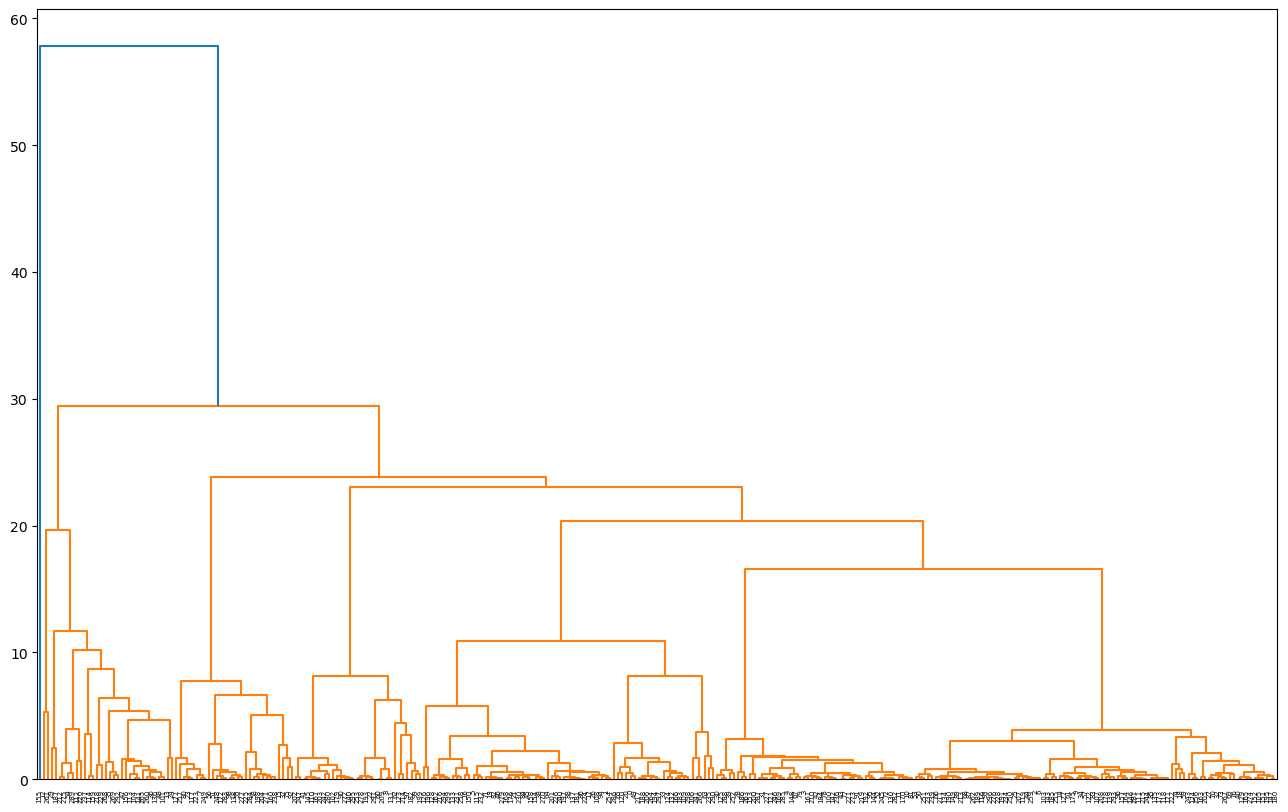

In [177]:
plt.figure(figsize=(16,10))
dend = sch.dendrogram(sch.linkage(df_sc[:300],method='ward'))

In [178]:
# Подгонка иерархической кластеризации к набору данных
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
hc_clusters = hc.fit_predict(df_sc[:300])

In [179]:
print(hc_clusters)

[5 5 2 2 2 5 2 4 1 2 2 2 0 0 2 4 5 5 2 5 5 5 1 4 0 2 5 2 2 0 2 2 2 5 2 0 0
 4 5 2 2 1 2 2 2 5 5 0 0 5 2 4 2 2 0 4 4 2 4 2 1 2 1 5 5 5 2 2 2 2 2 5 2 2
 2 4 2 2 2 2 4 2 5 2 5 2 5 2 5 2 1 2 4 2 5 2 2 1 4 1 2 0 1 2 0 2 5 2 5 5 1
 2 0 0 0 5 2 4 2 2 5 2 2 1 5 2 5 2 5 2 2 1 5 5 2 2 0 5 4 2 1 0 2 2 2 1 2 2
 2 2 5 2 2 2 5 3 0 2 5 0 4 2 5 2 2 2 5 1 5 2 2 2 4 2 2 2 5 4 2 1 2 5 1 5 2
 2 2 0 5 2 2 2 2 1 5 2 5 5 4 1 2 5 1 1 4 2 5 2 2 1 2 2 0 2 1 2 5 5 0 2 0 2
 2 4 5 4 5 2 2 0 5 5 5 2 2 5 2 0 4 2 5 5 1 2 2 2 2 1 4 4 2 2 2 1 5 2 2 4 5
 2 0 0 2 2 5 0 5 2 0 0 5 4 1 2 2 0 2 4 1 5 1 2 2 4 4 2 5 2 2 0 5 1 0 2 5 1
 2 5 5 5]
